<a href="https://colab.research.google.com/github/DanielAG34/EDP/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere la función del pulso unitario <br>
$(x)= \left\{ \begin{array}{lcc} 1 & si & -1 \leq x \leq 1 \\ \\0 & si & x \notin [-1, 1] \end{array} \right. $ <br>
$a)$ Grafique esta función. <br>
$b)$ Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. <br>
Grafique el resultado sobre la función original y compare. <br>
$c)$ Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. <br>
Grafique sobre la función original en un panel distinto al del inciso b)



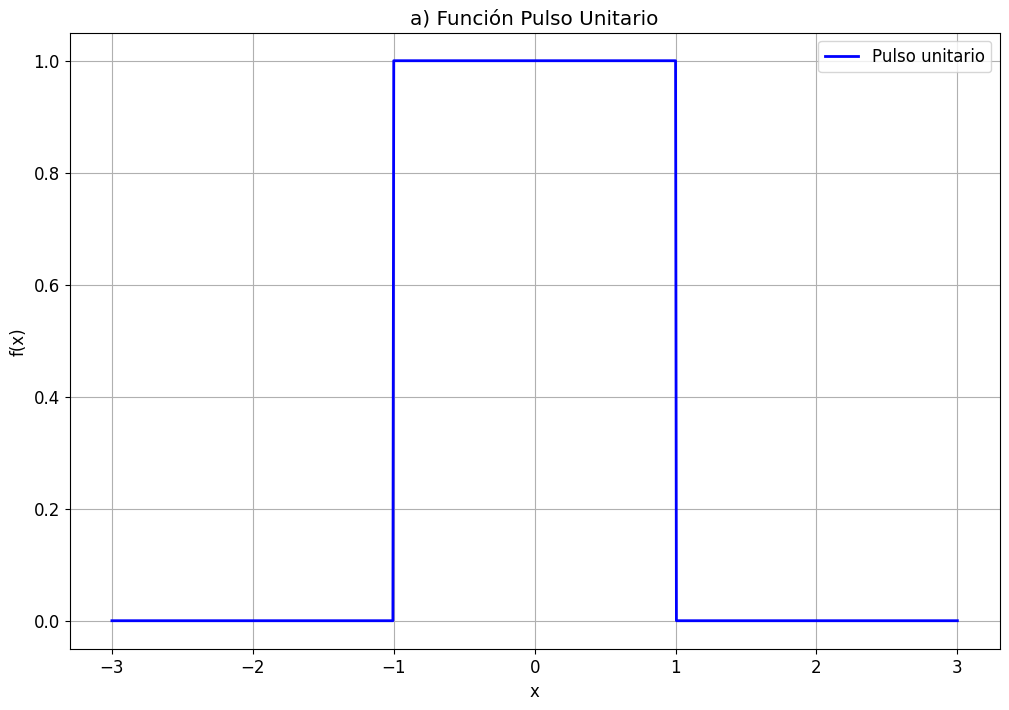

Representación como integral de Fourier:
⎧                                                                              ↪
⎪       -x + │x│                                                               ↪
⎪       ────────                                 for │2⋅arg(x) - π│ ≤ π ∧ │2⋅a ↪
⎪       2⋅π⋅│x│                                                                ↪
⎪                                                                              ↪
⎪                                                                              ↪
⎪                                                                              ↪
⎪           1                                                                  ↪
⎪          ───                                         for │2⋅arg(x) - π│ ≤ π  ↪
⎪          2⋅π                                                                 ↪
⎪                                                                              ↪
⎪                                                                   

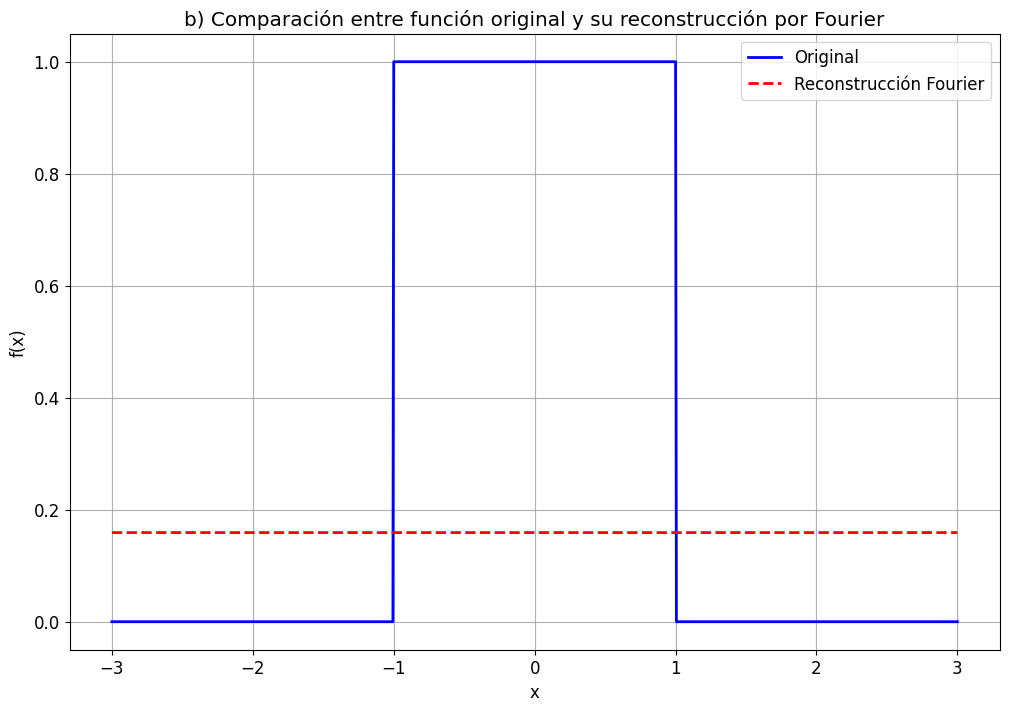

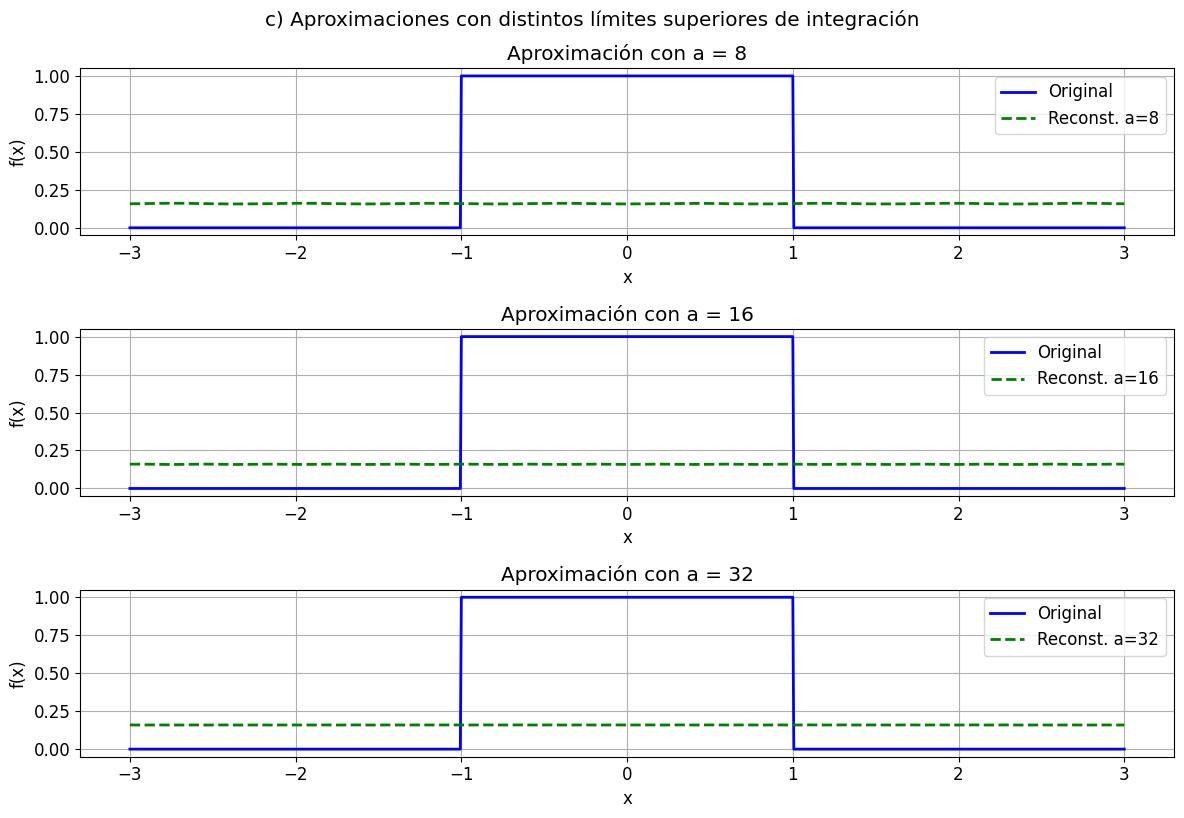

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import fourier_transform, exp, Heaviside, pi, sin, cos, Integral, oo

# Configuración de matplotlib para gráficos más grandes
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Definición de la función pulso unitario
def pulso_unitario(x):
    return np.where((x >= -1) & (x <= 1), 1, 0)

# a) Gráfico de la función original
x_vals = np.linspace(-3, 3, 1000)
y_vals = pulso_unitario(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='Pulso unitario')
plt.title('a) Función Pulso Unitario')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# b) Representación como integral de Fourier usando sympy
x, k, a = sp.symbols('x k a', real=True)

# Definición simbólica de la función pulso unitario
f = Heaviside(x + 1) - Heaviside(x - 1)

# Cálculo de la transformada de Fourier
F_k = sp.fourier_transform(f, x, k)
F_k = F_k.rewrite(sp.exp).simplify()

# La representación en integral de Fourier es la inversa de F_k
f_rec = 1/(2*sp.pi) * sp.integrate(F_k * sp.exp(sp.I*k*x), (k, -oo, oo))

# Simplificamos la expresión
f_rec_simplified = sp.simplify(f_rec.rewrite(sp.sin))

print("Representación como integral de Fourier:")
sp.pretty_print(f_rec_simplified)

# Evaluación numérica de la reconstrucción
F_k_func = sp.lambdify(k, F_k, 'numpy')

def reconstruccion_fourier(x_val, a_max=1000):
    integrand = lambda k: np.real(F_k_func(k) * np.exp(1j*k*x_val))
    k_vals = np.linspace(-a_max, a_max, 10000)
    dk = k_vals[1] - k_vals[0]
    integral = np.sum(integrand(k_vals)) * dk
    return integral / (2*np.pi)

# Evaluamos la reconstrucción en los mismos puntos x_vals
y_rec = np.array([reconstruccion_fourier(x_val) for x_val in x_vals])

# Gráfico comparativo
plt.figure()
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='Original')
plt.plot(x_vals, y_rec, 'r--', linewidth=2, label='Reconstrucción Fourier')
plt.title('b) Comparación entre función original y su reconstrucción por Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# c) Aproximaciones con distintos límites superiores
a_values = [8, 16, 32]

plt.figure(figsize=(12, 8))
for i, a_val in enumerate(a_values):
    # Calculamos la reconstrucción con límite finito
    y_rec_a = np.array([reconstruccion_fourier(x_val, a_max=a_val) for x_val in x_vals])

    plt.subplot(3, 1, i+1)
    plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='Original')
    plt.plot(x_vals, y_rec_a, 'g--', linewidth=2, label=f'Reconst. a={a_val}')
    plt.title(f'Aproximación con a = {a_val}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle('c) Aproximaciones con distintos límites superiores de integración', y=1.02)
plt.show()